# Install dependencies

In [ ]:
%pip install PyBerries==0.2.18

# Settings

Select the datasets to be processed, and some additional settings.

All available measurement tables will be loaded.

If multiple datasets are given as input, they will be concatenated.

- `dataset_name`: name of Bacmman datasets to plot (can be one dataset, or several separated by commas). Example:
    - `dataset_name = ['Dataset_1', 'Dataset_2']`
- `bacmman_path`: path to the folder that contains the dataset folders. Note: you can specify a single path to use for every dataset, or a different path for each dataset.
- `filters`: use this to filter an object based on one or several columns. Separate multiple filters with "and" or "or" operators. For example:
    - `filters = {'Bacteria':'SpineLength > 2.5'}` to keep only cells longer than 2.5 µm
    - `filters = {'Bacteria':'CFPCount == 1'}` to keep only cells with exactly one CFP spot
    - `filters = {'Bacteria':'SpineLength > 2.5 and CFPCount >= 1'}` to keep only cells longer than 2.5 µm and that have at least one CFP spot
    - `filters = {'CFP_spots':'DistCC_oc2 < 0.4'}` to keep only CFP spots that are closer than 0.4 µm to a spot from channel 2
    - ...or perform simple operations on columns, such as `filters = {'CFP_spots': 'SpineCurvilinearCoord > 0.25*SpineLength'}`

Note: if a cell is filtered out, all the spots it contains will be removed as well.

In [1]:
bacmman_path = 'D:\Daniel\BACMMAN\Tests' # Folder that contains the dataset
dataset_list = ['230221_Abby'] # Bacmman dataset names

filters = {}

spot_table = 'CFP_spots'

# Import dataset

In [2]:
from pyberries.data import DatasetPool

data = (DatasetPool(path=bacmman_path, dsList=dataset_list, groups=[0]*len(dataset_list), filters=filters)
        .heatmap_metrics(object_name=spot_table)
        )

Dataset 230221_Abby: loaded objects ['Bacteria', 'CFP_spots', 'mCherry_spots', 'YFP_spots']


## Filter parent tables

Run this cell if you want to filter out Bacteria that are not present in the specified spots table

In [ ]:
data.filter_parent(object_name=['CFP_spots', 'mCherry_spots'], inplace=True)

# Datasets summary

In [ ]:
data.describe('mean')

# Figures

## Heatmap of normalised spot positions

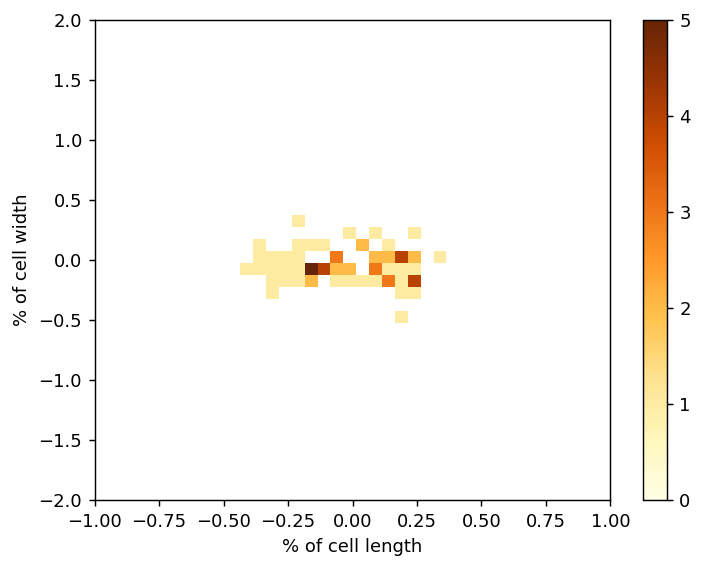

In [3]:
binwidth = 0.05

plot_args = {'x':'normLongCoord',
            'y':'normShortCoord',
            'binwidth':(binwidth, binwidth*2),
            'stat':'count',
            'title':'',
            'xlabel':'% of cell length',
            'ylabel':'% of cell width',
            'cmap':'YlOrBr'
            }

data.plot_preset(preset='heatmap', object_name=spot_table, xlim=(-1, 1), ylim=(-2, 2), **plot_args)

## Fork plot of spot positions

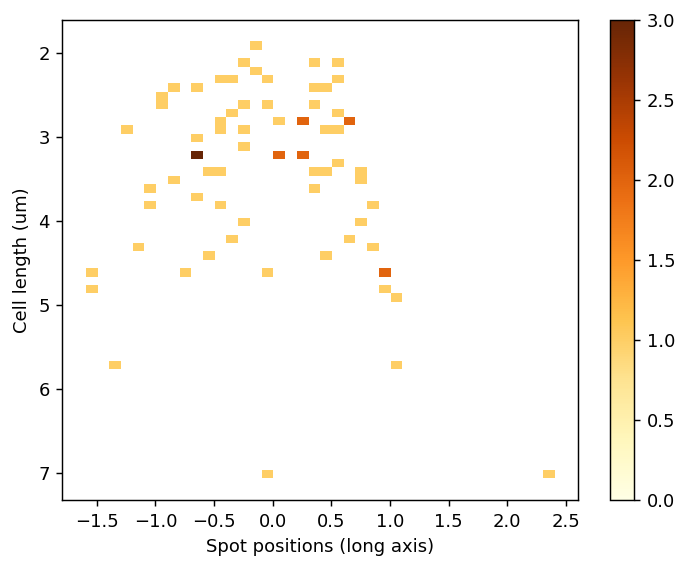

In [4]:
plot_args = {
            'binwidth':(0.1, 0.1),
            'stat':'count',
            'title':'',
            'xlabel':'Spot positions (long axis)',
            'ylabel':'Cell length (um)',
            'xlim':(None, None),
            'ylim':(None, None),
            'cmap':'YlOrBr',
            }

data.plot_preset(preset='heatmap', object_name=spot_table, x='centerLongCoord', y='SpineLength', revert_y_axis=True, **plot_args)